<a href="https://colab.research.google.com/github/TopStrikr/Data-Analysis-in-Sports-using-Python/blob/main/Kohli_vs_Tendulkar_RPI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welch’s t-test results:
t-statistic: 0.6664
p-value: 0.5058
Result: Not statistically significant (fail to reject H0)


<ipython-input-1-b9fd91492ce9>:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([kohli_rpi, tendulkar_rpi], labels=['Kohli', 'Tendulkar'])


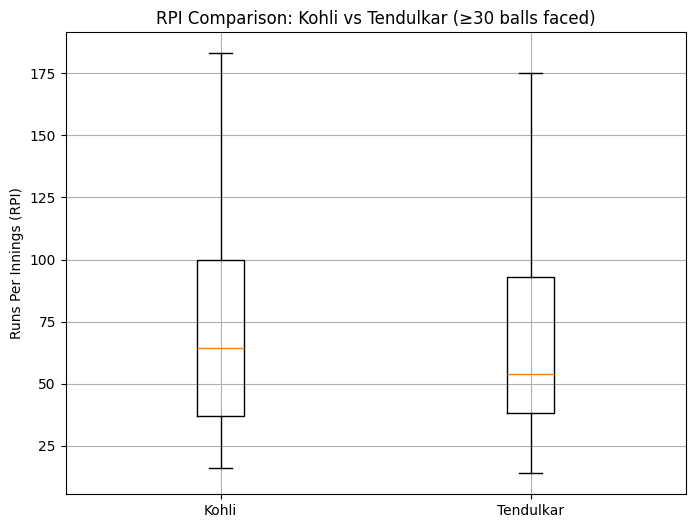

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('ODI_data.csv')

# Strip column names
df.columns = df.columns.str.strip()

# Filter for Kohli and Tendulkar
players_df = df[df['Innings Player'].isin(['V Kohli', 'SR Tendulkar'])].copy()

# Convert columns to numeric
players_df['Innings Balls Faced'] = pd.to_numeric(players_df['Innings Balls Faced'], errors='coerce')
players_df['Innings Runs Scored'] = pd.to_numeric(players_df['Innings Runs Scored'], errors='coerce')

# Filter for innings with >= 30 balls faced
filtered_df = players_df[players_df['Innings Balls Faced'] >= 30]

# Extract RPI values
kohli_rpi = filtered_df[filtered_df['Innings Player'] == 'V Kohli']['Innings Runs Scored'].dropna().tolist()
tendulkar_rpi = filtered_df[filtered_df['Innings Player'] == 'SR Tendulkar']['Innings Runs Scored'].dropna().tolist()

# Perform Welch’s t-test
t_stat, p_value = ttest_ind(kohli_rpi, tendulkar_rpi, equal_var=False)

# Print results
print("Welch’s t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Statistically significant difference (reject H0)")
else:
    print("Result: Not statistically significant (fail to reject H0)")

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([kohli_rpi, tendulkar_rpi], labels=['Kohli', 'Tendulkar'])
plt.title('RPI Comparison: Kohli vs Tendulkar (≥30 balls faced)')
plt.ylabel('Runs Per Innings (RPI)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load your ODI dataset
df = pd.read_csv('/content/ODI_data.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Filter players
players_df = df[df['Innings Player'].isin(['V Kohli', 'SR Tendulkar'])].copy()

# Convert relevant columns to numeric
players_df['Innings Runs Scored'] = pd.to_numeric(players_df['Innings Runs Scored'], errors='coerce')
players_df['Innings Balls Faced'] = pd.to_numeric(players_df['Innings Balls Faced'], errors='coerce')

# Optional: drop innings with very few balls faced (e.g., <10)
players_df = players_df[players_df['Innings Balls Faced'] >= 10]

# Compute Strike Rate if not already there
players_df['Computed_SR'] = (players_df['Innings Runs Scored'] / players_df['Innings Balls Faced']) * 100

# Split into Kohli and Tendulkar
kohli_sr = players_df[players_df['Innings Player'] == 'V Kohli']['Computed_SR'].dropna()
tendulkar_sr = players_df[players_df['Innings Player'] == 'SR Tendulkar']['Computed_SR'].dropna()

# Perform Welch's t-test
t_stat, p_value = ttest_ind(kohli_sr, tendulkar_sr, equal_var=False)

# Display results
print("Welch’s t-test for Strike Rate:")
print(f"Kohli Mean SR: {kohli_sr.mean():.2f}")
print(f"Tendulkar Mean SR: {tendulkar_sr.mean():.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant difference (reject H0)")
else:
    print("Result: Not statistically significant (fail to reject H0)")


Welch’s t-test for Strike Rate:
Kohli Mean SR: 82.00
Tendulkar Mean SR: 78.96
p-value: 0.2381
Result: Not statistically significant (fail to reject H0)


<ipython-input-2-02356f44e9df>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([kohli_sr, tendulkar_sr], labels=['Kohli', 'Tendulkar'])


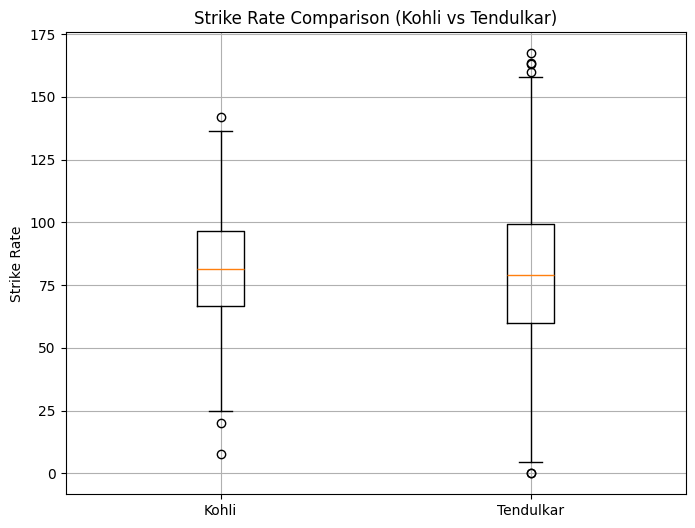

In [ ]:
import matplotlib.pyplot as plt

# Create boxplot of strike rates
plt.figure(figsize=(8, 6))
plt.boxplot([kohli_sr, tendulkar_sr], labels=['Kohli', 'Tendulkar'])
plt.title('Strike Rate Comparison (Kohli vs Tendulkar)')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Example input from earlier step:
# Suppose:
# Kohli → 44 centuries in 265 innings
# Tendulkar → 49 centuries in 452 innings

# Replace these with actual counts from your earlier code
kohli_100s = 44
kohli_innings = 265

tendulkar_100s = 49
tendulkar_innings = 452

# Run proportion z-test
count = [kohli_100s, tendulkar_100s]
nobs = [kohli_innings, tendulkar_innings]

stat, pval = proportions_ztest(count, nobs)

print(f"Z-statistic: {stat:.4f}")
print(f"p-value: {pval:.4f}")
if pval < 0.05:
    print("Result: Statistically significant difference in 100s per innings")
else:
    print("Result: No statistically significant difference in 100s per innings")


Z-statistic: 2.2170
p-value: 0.0266
Result: Statistically significant difference in 100s per innings


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Replace these with your actual counts from earlier code
kohli_50s = 64  # Example: innings where Kohli scored between 50 and 99
kohli_innings = 265

tendulkar_50s = 96
tendulkar_innings = 452

# Run proportion z-test
count = [kohli_50s, tendulkar_50s]
nobs = [kohli_innings, tendulkar_innings]

stat, pval = proportions_ztest(count, nobs)

print(f"Z-statistic: {stat:.4f}")
print(f"p-value: {pval:.4f}")
if pval < 0.05:
    print("Result: Statistically significant difference in 50s per innings")
else:
    print("Result: No statistically significant difference in 50s per innings")


Z-statistic: 0.9040
p-value: 0.3660
Result: No statistically significant difference in 50s per innings


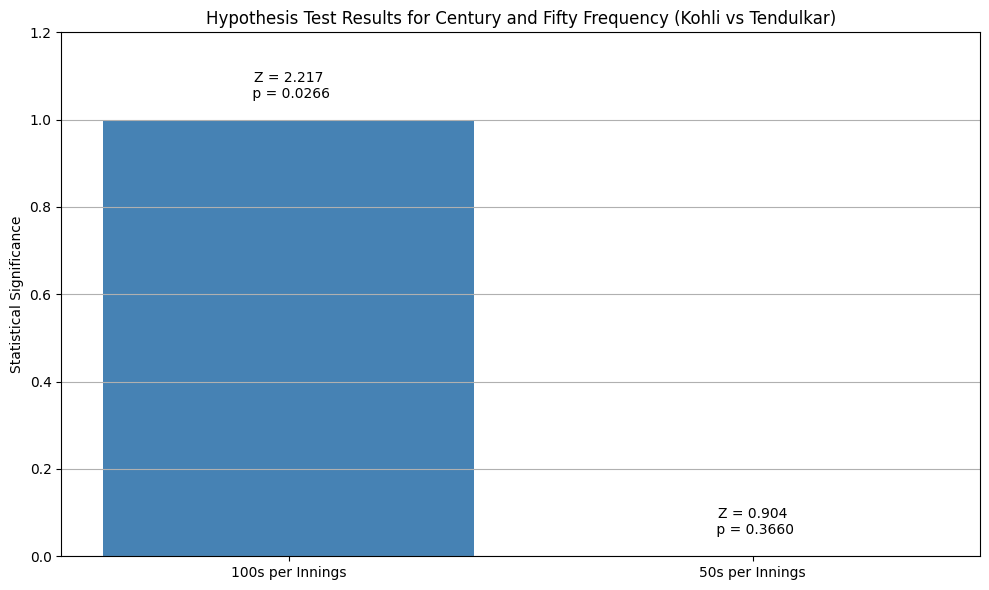

In [ ]:
import matplotlib.pyplot as plt

# Use your actual results
metrics = ['100s per Innings', '50s per Innings']
p_values = [0.0266, 0.3660]
z_stats = [2.2170, 0.9040]
significance = [1 if p < 0.05 else 0 for p in p_values]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, significance, color=['steelblue', 'seagreen'])
plt.ylim(0, 1.2)
plt.ylabel('Statistical Significance')
plt.title('Hypothesis Test Results for Century and Fifty Frequency (Kohli vs Tendulkar)')
plt.grid(axis='y')

# Annotate with p-values and z-stats
for i in range(len(metrics)):
    plt.text(i, significance[i] + 0.05,
             f"Z = {z_stats[i]:.3f}\n p = {p_values[i]:.4f}",
             ha='center', fontsize=10, color='black')

plt.xticks(ticks=range(len(metrics)), labels=metrics)
plt.tight_layout()
plt.show()


In [ ]:
df.columns = df.columns.str.strip()

# Clean numeric columns
df['Innings Runs Scored Num'] = pd.to_numeric(df['Innings Runs Scored Num'], errors='coerce')

# Filter data
sdf = df[df['Innings Player'] == 'SR Tendulkar'].copy()     # Sachin data
kdf = df[df['Innings Player'] == 'V Kohli'].copy()          # Kohli data

# Rest of India (excluding Sachin/Kohli)
non_sachin_df = df[df['Innings Player'] != 'SR Tendulkar'].copy()
non_kohli_df = df[df['Innings Player'] != 'V Kohli'].copy()

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Assume sdf and kdf are Sachin's and Kohli's innings
# non_sachin_df and non_kohli_df are the rest of the Indian team in those matches

# Merge Sachin's innings with India's total for each match
sdf['match_id'] = sdf['Innings Date'] + "_" + sdf['Ground']  # or use real match ID if available
non_sachin_df['match_id'] = non_sachin_df['Innings Date'] + "_" + non_sachin_df['Ground']

# Compute total team runs per match (including Sachin)
team_runs_sachin = non_sachin_df[non_sachin_df['Country'] == 'India'].groupby('match_id')['Innings Runs Scored Num'].sum()
sachin_runs = sdf.groupby('match_id')['Innings Runs Scored Num'].sum()

match_contrib_sachin = 100 * sachin_runs / (team_runs_sachin + sachin_runs)

# Repeat for Kohli
kdf['match_id'] = kdf['Innings Date'] + "_" + kdf['Ground']
non_kohli_df['match_id'] = non_kohli_df['Innings Date'] + "_" + non_kohli_df['Ground']

team_runs_kohli = non_kohli_df[non_kohli_df['Country'] == 'India'].groupby('match_id')['Innings Runs Scored Num'].sum()
kohli_runs = kdf.groupby('match_id')['Innings Runs Scored Num'].sum()

match_contrib_kohli = 100 * kohli_runs / (team_runs_kohli + kohli_runs)

# Align the two Series to avoid NaNs if needed
match_contrib_sachin = match_contrib_sachin.dropna()
match_contrib_kohli = match_contrib_kohli.dropna()

# Perform Welch’s t-test
t_stat, p_value = ttest_ind(match_contrib_kohli, match_contrib_sachin, equal_var=False)

print(f"Welch’s t-test: t = {t_stat:.4f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("✅ Statistically significant difference in match-wise team contribution.")
else:
    print("❌ No statistically significant difference in match-wise team contribution.")


Welch’s t-test: t = 0.9800, p = 0.3276
❌ No statistically significant difference in match-wise team contribution.


<ipython-input-9-d6d226470563>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([match_contrib_kohli, match_contrib_sachin], labels=['Kohli', 'Tendulkar'])


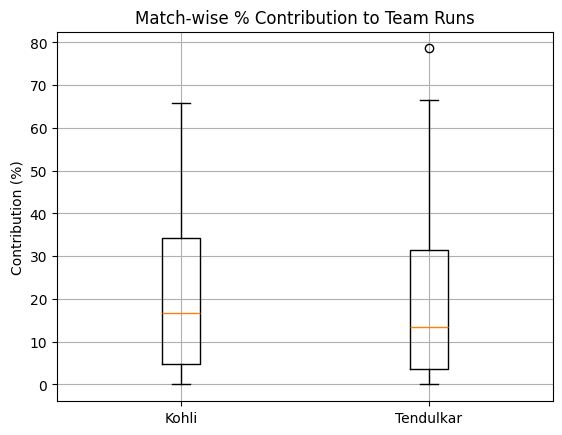

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([match_contrib_kohli, match_contrib_sachin], labels=['Kohli', 'Tendulkar'])
plt.title('Match-wise % Contribution to Team Runs')
plt.ylabel('Contribution (%)')
plt.grid(True)
plt.show()
